<a href="https://colab.research.google.com/github/Abhishek1642001/The-Sparks-Foundation---Data-Science-Business-Analytics-Internship/blob/main/Task1_Pred_Using_SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # GRIP : The Sparks Foundation



  ### Data Science and Business Analytic Internship



  ### Author : Abhishek Makude



  ### Task 1 : Prediction using Supervised ML



  In this task, we have to predict the percentage of a student based on
  the number of hours. 


  Simple Linear Regression is used to predict percentage
  score of student using study hours.

Dataset Sample: http://bit.ly/w-data

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading the Data
data=pd.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Exploring the Data 

In [5]:
print(data.shape)


(25, 2)


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 Checking for any null value in the Dataset

In [5]:
data.isnull == True 


False

We found no null value so, we can now visualize our Data


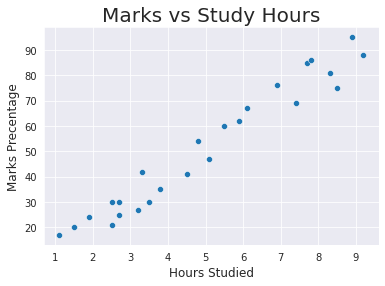

In [6]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Marks vs Study Hours',size=20)
plt.ylabel('Marks Precentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()



Here in the scatter plot we see a correaltion between the 'Marks Percentage' and 'Hours Studied'

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


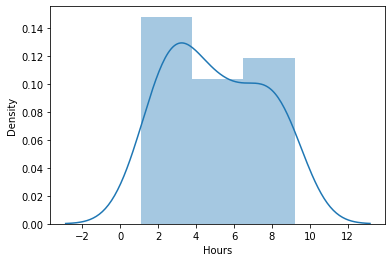

In [13]:
hours=data['Hours']
scores=data['Scores']
sns.distplot(hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


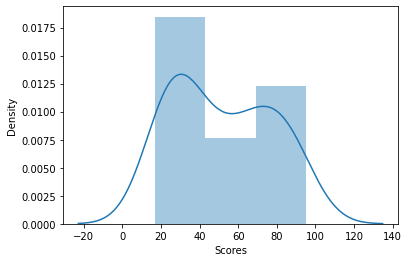

In [15]:
sns.distplot(scores)



Lets plot the Regression line and confirm it

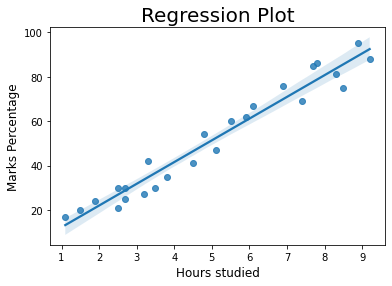

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel("Marks Percentage",size=12)
plt.xlabel('Hours studied',size=12)
plt.show()
print(data.corr())



Here we can see that the variables are postively correlated

Now we are training the Model

1> Split the Data

In [17]:
# Define x and y in Data
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

# Split it into two parts
train_x, val_x , train_y ,val_y =train_test_split(x,y,random_state=0)


2> Fit the Data into the Model


In [18]:
regression=LinearRegression()
regression.fit(train_x,train_y)
print("Model is Trained")  

Model is Trained


Predict the percentage of the marks

In [19]:
pred_y=regression.predict(val_x)
prediction=pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the Predicted Marks with the Actual Marks 

In [20]:
compare_scores=pd.DataFrame({'Actual Marks':val_y,'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visual comparison between the Actual and Predicted Values


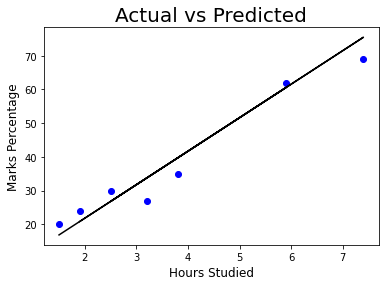

In [21]:
plt.scatter(x=val_x,y=val_y,color='blue')
plt.plot(val_x,pred_y,color='Black')
plt.title('Actual vs Predicted',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

Evaluating the Model

In [22]:
# Calclating the accuracy of the model
print('Mean Absoulte Error:',mean_absolute_error(val_y,pred_y))


Mean Absoulte Error: 4.130879918502482


Small Value of Mean Absolute value states that the chances of error or wrong forecasting through the model are very less

What will be the predicted score of a student if he/she studies for 9.25hrs/day?

In [23]:
hours = [9.25]
answer=regression.predict([hours])
print("score= {}".format(round(answer[0],3)))


score= 93.893


So according to the regression model if a student he/shes studies for 9.25 hrs a day then they are likely to score 93.89 marks 